In [1]:
!sudo apt-get update --fix-missing

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Packages [12.3 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 

In [2]:
!sudo apt-get install libzbar-dev
!pip install opencv-contrib-python
!pip install pyzbar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gir1.2-freedesktop
  gir1.2-gdkpixbuf-2.0 gir1.2-rsvg-2.0 gsfonts imagemagick-6-common
  libcairo-script-interpreter2 libcairo2-dev libcupsfilters1 libcupsimage2
  libdjvulibre-dev libdjvulibre-text libdjvulibre21 libgdk-pixbuf2.0-dev
  libgs9 libgs9-common libijs-0.35 libjbig2dec0 liblcms2-dev liblqr-1-0
  liblqr-1-0-dev libmagick++-6-headers libmagick++-6.q16-7
  libmagick++-6.q16-dev libmagick++-dev libmagickcore-6-arch-config
  libmagickcore-6-headers libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickcore-6.q16-dev libmagickwand-6-headers libmagickwand-6.q16-3
  libmagickwand-6.q16-dev libpixman-1-dev librsvg2-dev libv4l-0 libv4lconvert0

In [0]:
import pyzbar.pyzbar as pyzbar
from google.colab import drive
import cv2
import numpy as np
import sys
import time
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import imutils

%matplotlib inline


In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


(1280, 959, 3)
1280 959


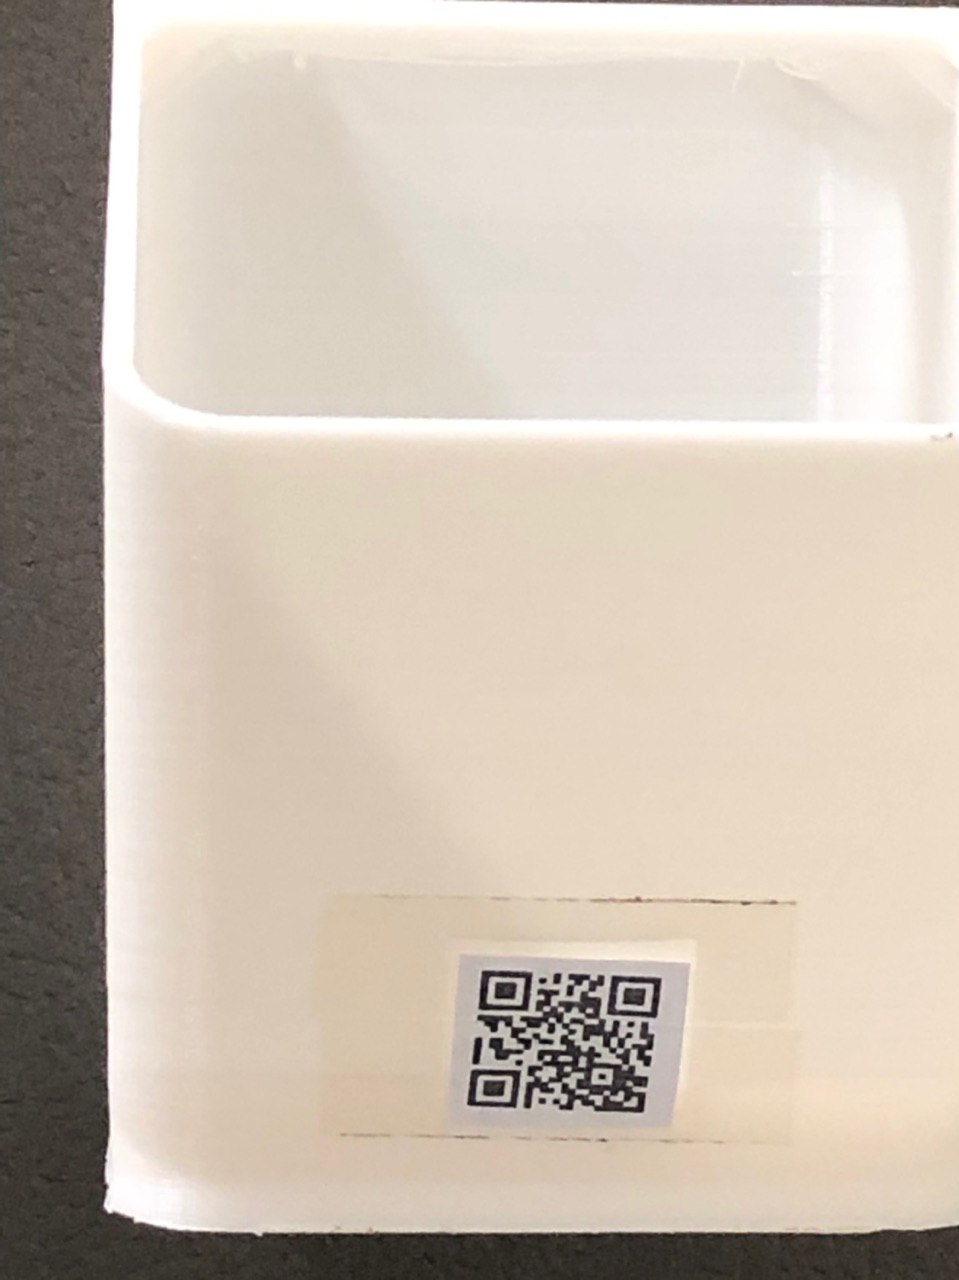

In [8]:
image = cv2.imread("/content/pot_zoom_test.png")
print(image.shape)
(h, w) = image.shape[:2]
print(h, w)
cv2_imshow(image)

In [0]:
# image = cv2.imread("/content/drive/My Drive/plants/qr1.jpg")

# image = imutils.rotate_bound(image, -90)
# plt.imshow(image)


Type: QRCODE
Data:  b'http://bit.ly/iMIzVb?r=qr' 



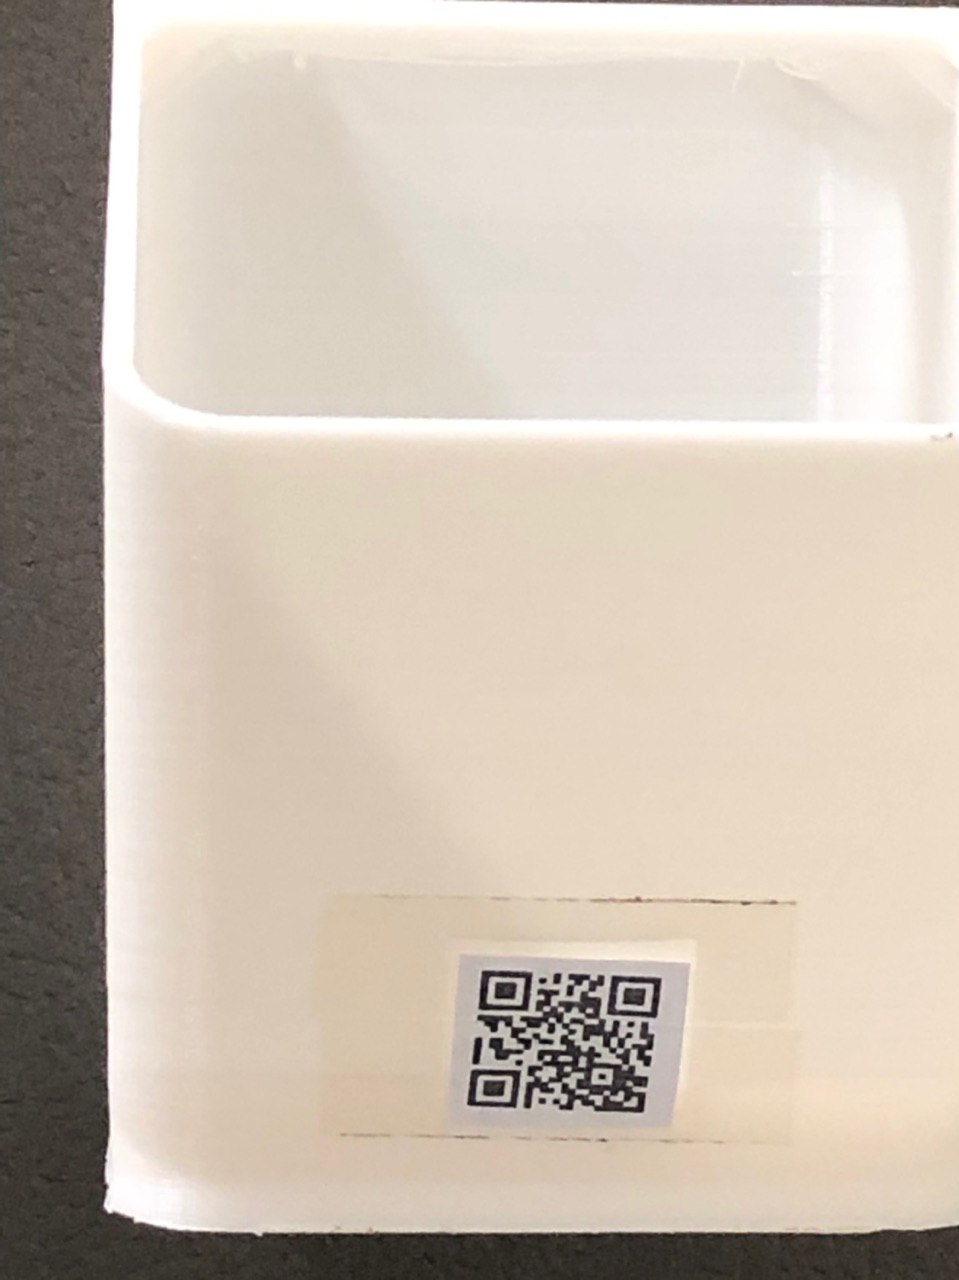

In [9]:
decodedObjects = pyzbar.decode(image)
for obj in decodedObjects:
    print("Type:", obj.type)
    print("Data: ", obj.data, "\n")

cv2_imshow(image)


In [0]:
for object in decodedObjects:
  (x, y, w, h) = object.rect
  cv2.rectangle(image, (x,y), (x + w, y + h), (0,0, 255), 2)
  barcodeData = object.data.decode("utf-8")
  barcodeType = object.type
  
  text = "{}".format(barcodeData)
  cv2.putText(image, text, (x - 80, y-17), cv2.FONT_HERSHEY_PLAIN, 1, (0,0,255), 2)

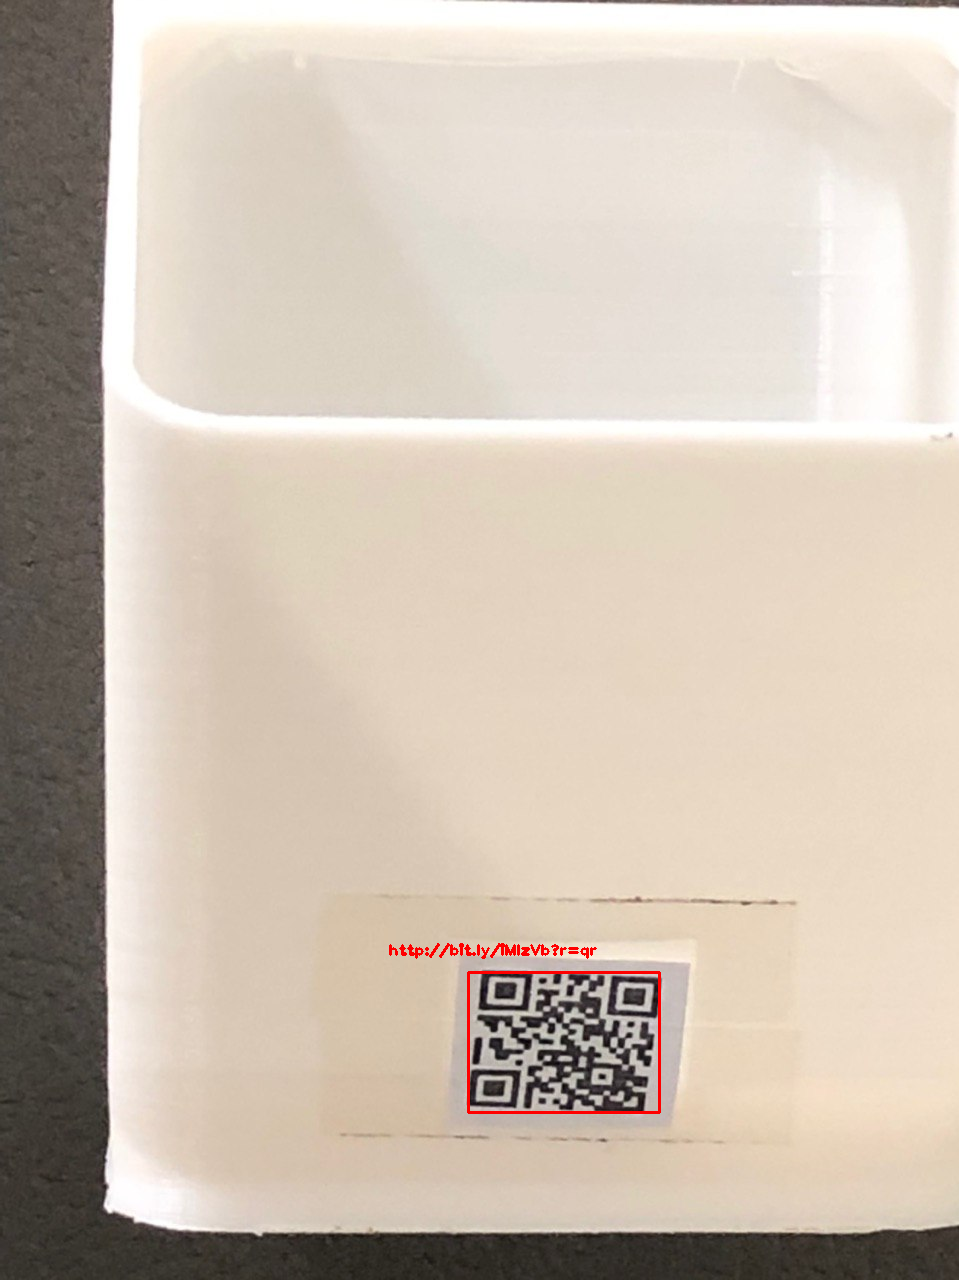

In [11]:
cv2_imshow(image)